# Dashboard - Armazém Paraíba

## Informações sobre Ventiladores, Televisores e Geladeiras

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.graph_objects as go

In [2]:
df_venti = pd.read_csv("32.csv", index_col=0)
df_tv = pd.read_csv("32.csv", index_col=0)
df_gel = pd.read_csv("32.csv", index_col=0)


In [3]:
df_venti = df_venti[[x for x in df_venti.columns if "VENTILADOR" in x]]
df_tv = df_tv[[x for x in df_tv.columns if "TELEVISOR" in x]]
df_gel = df_gel[[x for x in df_gel.columns if "REFRIGERADOR" in x]]

### Os ventiladores mais vendidos

In [4]:
#ventiladores
fig = go.FigureWidget( layout=go.Layout() )

su = df_venti.sum()

def show_latest(TOP):
    TOP = int(TOP)
    return su.sort_values(kind='quicksort', ascending=False).head(TOP)

interact(show_latest, TOP='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='TOP'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

### Os televisores mais vendidos

In [5]:
#televisores
fig = go.FigureWidget( layout=go.Layout() )

su = df_tv.sum()

def show_latest(TOP):
    TOP = int(TOP)
    return su.sort_values(kind='quicksort', ascending=False).head(TOP)

interact(show_latest, TOP='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='TOP'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

### As geladeiras mais vendidas

In [28]:
#geladeiras
fig = go.FigureWidget( layout=go.Layout() )

su = df_venti.sum()
#data_gel = su.sort_values(kind='quicksort', ascending=False).head(10)

def show_latest(TOP):
    TOP = int(TOP)
    return su.sort_values(kind='quicksort', ascending=False).head(TOP)

interact(show_latest, TOP='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='TOP'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [9]:
df_venti.fillna(value=0, inplace=True)
df_gel.fillna(value=0, inplace=True)
df_tv.fillna(value=0, inplace=True)

In [12]:
df_venti.index = pd.to_datetime(df_venti.index)
df_tv.index = pd.to_datetime(df_tv.index)
df_gel.index = pd.to_datetime(df_gel.index)

dfw_venti = df_venti.resample('W-THU').sum()
dfw_tv = df_tv.resample('W-THU').sum()
dfw_gel = df_gel.resample('W-THU').sum()


## Correlação dos produtos

In [20]:
# Ventiladores
corr_venti = dfw_venti.corr()
corr_gel = dfw_gel.corr()
corr_tv = dfw_tv.corr()

A partir da análise da matriz de correlação pode-se notar que não há muitos pares com correlação forte, do tipo, acima de p>=0.7 . 

Pares com correlação forte (p >= 0.7): 9


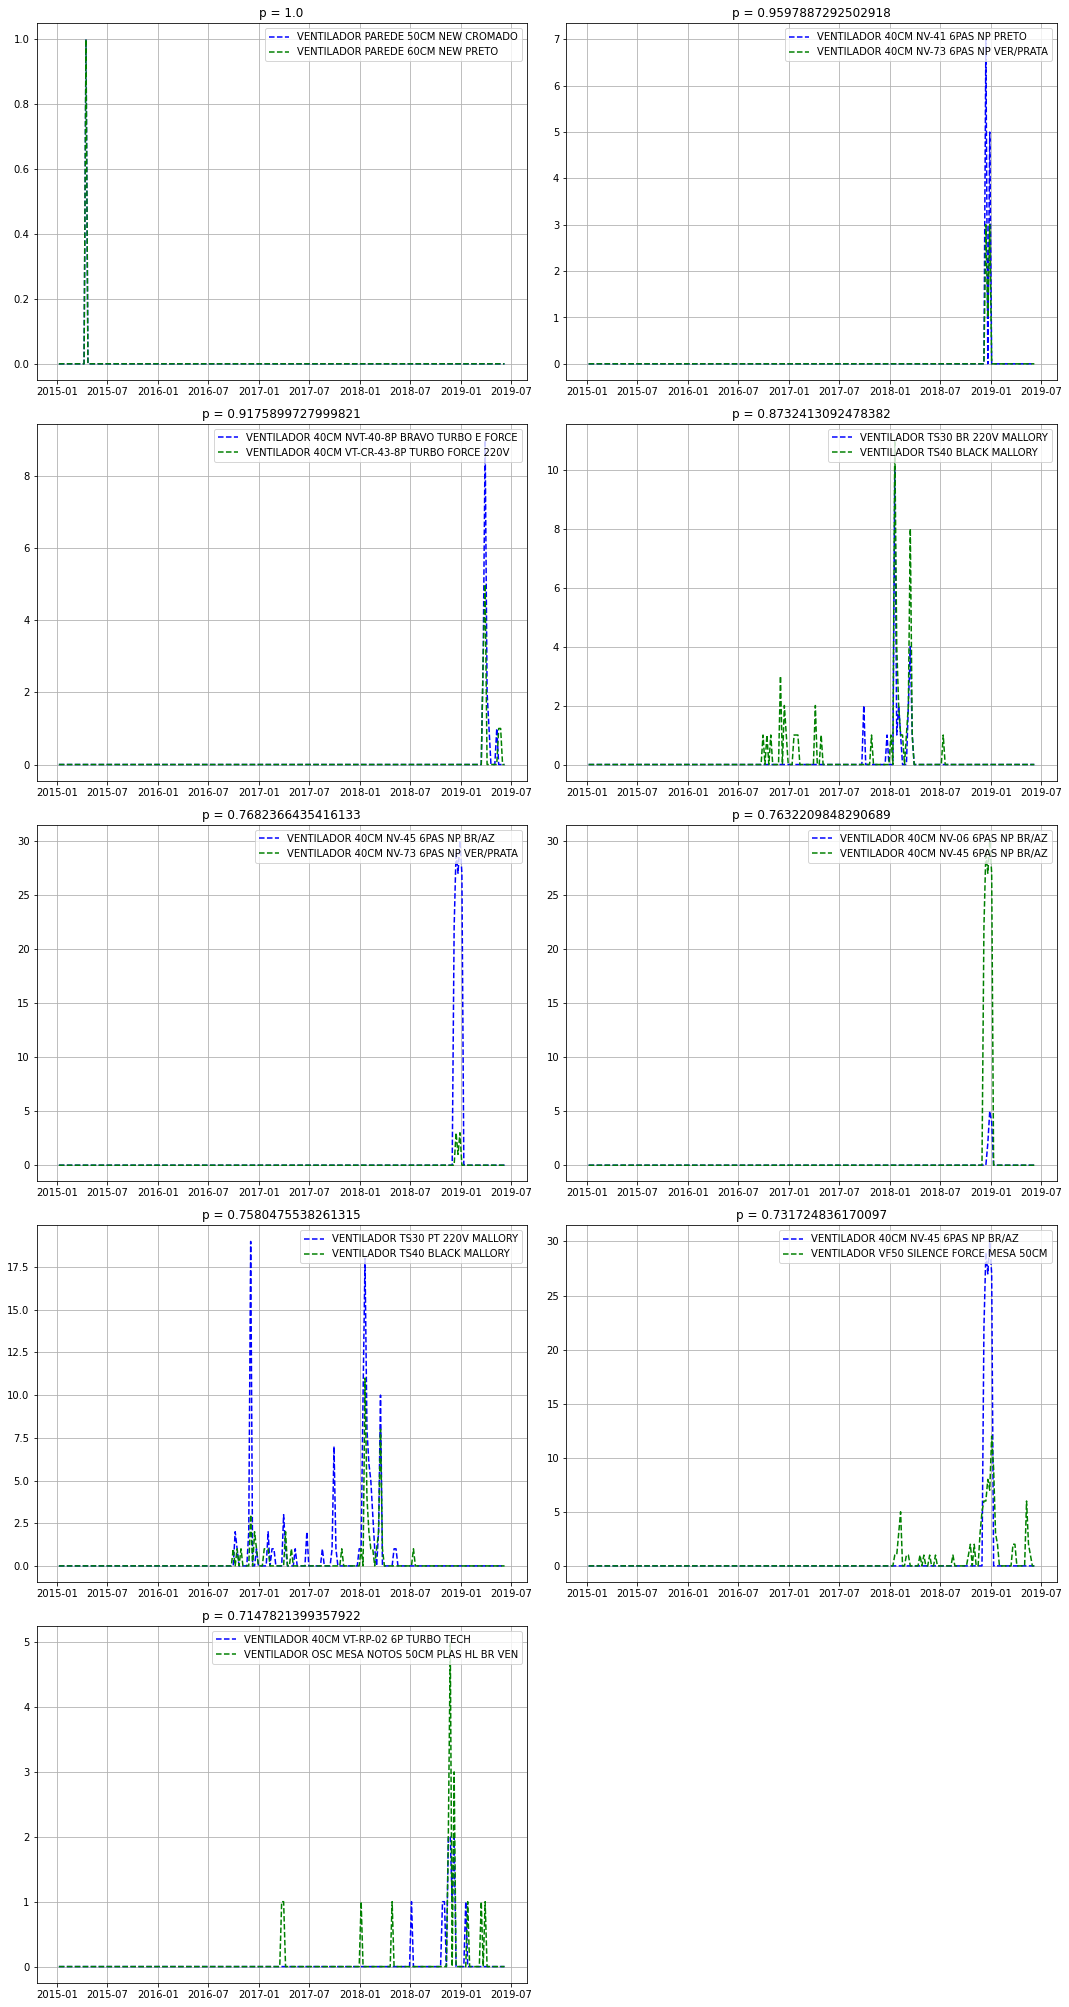

In [21]:
corr_venti.loc[:,:] = np.tril(corr_venti.values, k=-1)

s = corr_venti.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

plt.figure(figsize=(15,50))

num_s = len([x for x in so.tolist() if x >= 0.7])
print("Pares com correlação forte (p >= 0.7): %d" % num_s)

for i in range(num_s):
    plt.subplot(num_s, 2, i+1)
    plt.grid(True)
    plt.plot(dfw_venti[so.index[i][0]], "b--", dfw_venti[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

Percebe-se uma correlação forte(p>=0.7) entre 9 pares. Em alguns gráficos as vendas se concentram em poucos semanas. Já em outros as vendas se estendem por mais tempo, apresentando vários picos. Nota-se que os picos acontecem no verão. 

Pares com correlação negativa (p <= 0.2): 0 


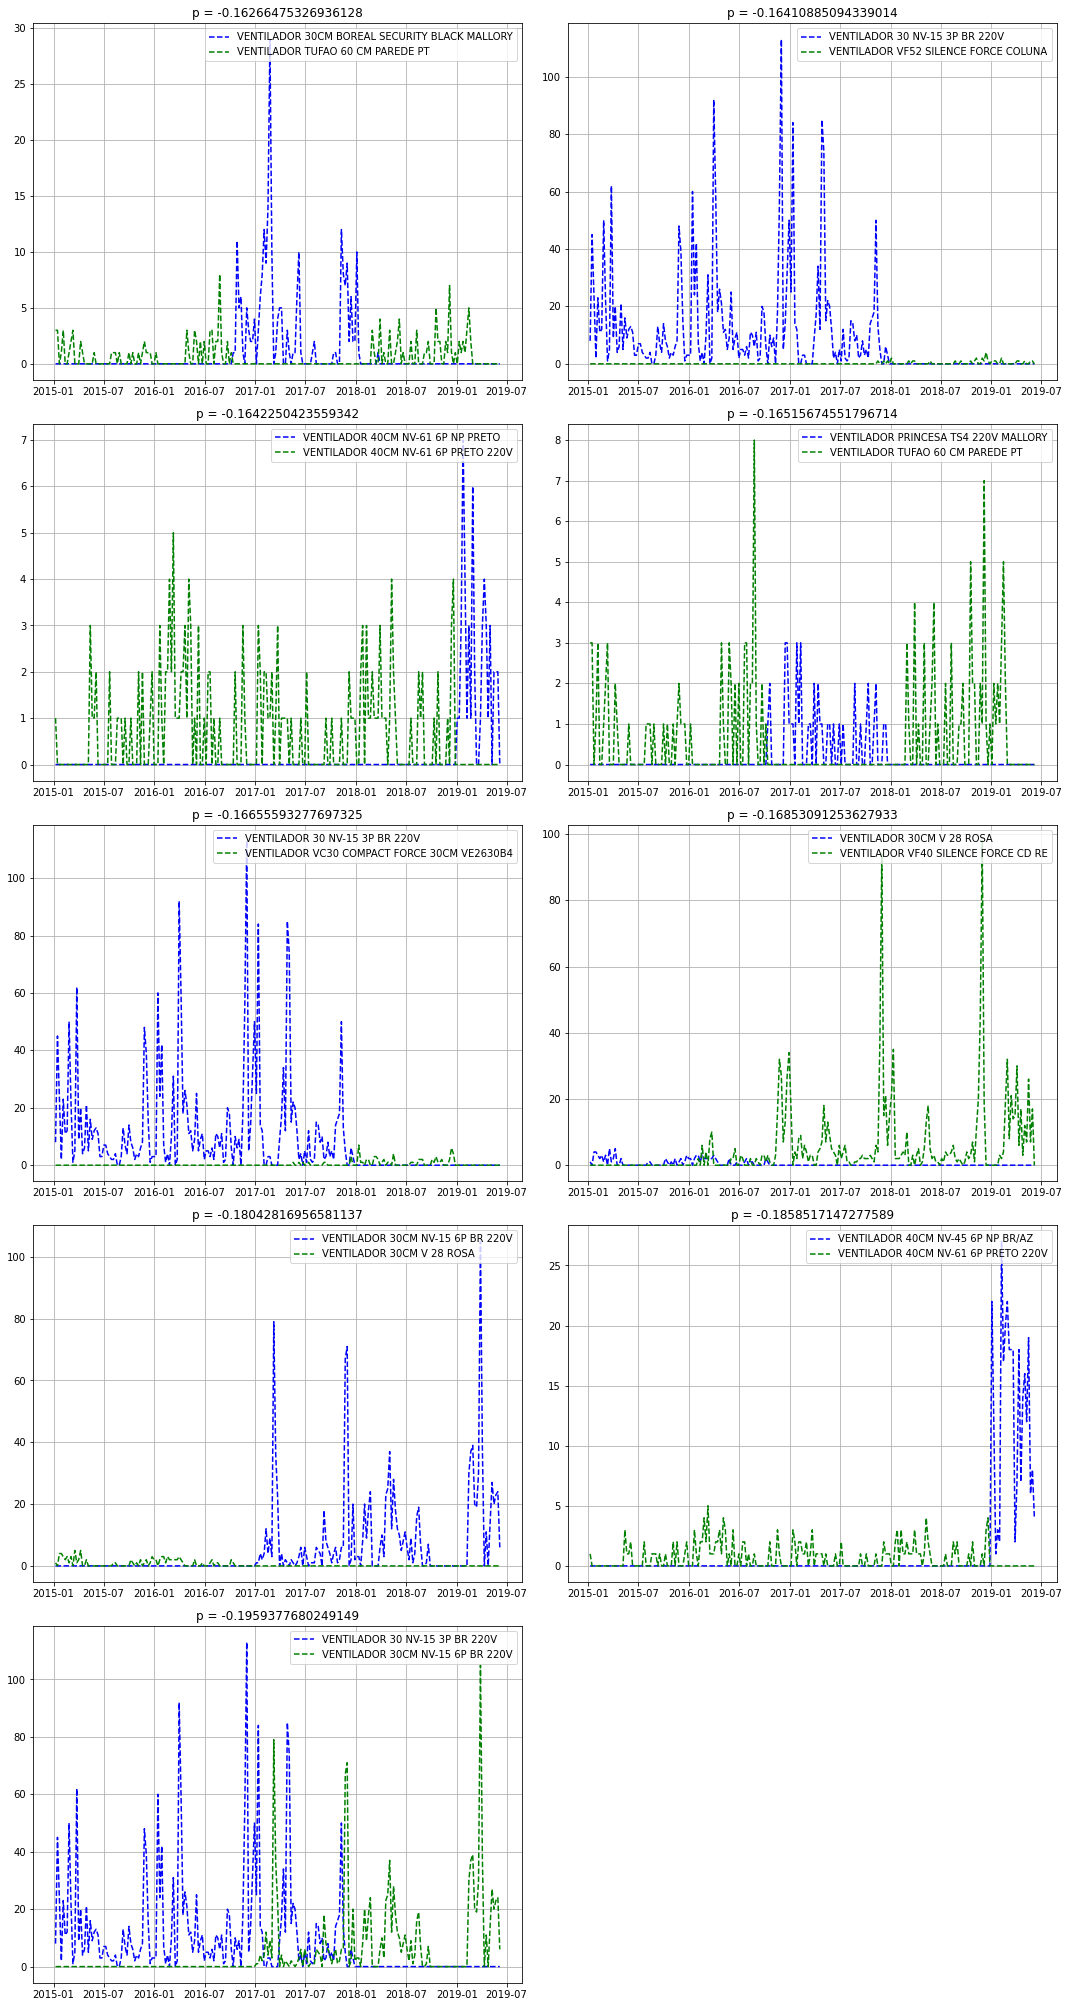

In [22]:
num_n = len([x for x in so.tolist() if x <= -0.2])

print("Pares com correlação negativa (p <= 0.2): %d " % num_n)
plt.figure(figsize=(15,50))

for i in range(len(so)-num_s, len(so)):
    plt.subplot(num_s, 2, i+1-len(so)+num_s)
    plt.grid(True)
    plt.plot(dfw_venti[so.index[i][0]], "b--", dfw_venti[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
    
plt.tight_layout()
plt.show()

Já em relação as correlações negativas(p<=0.2) não foi encontrado nenhum par. Sendo assim nenhum modelo será incorporado um ao outro para formar uma nova categoria.  Alguns modelos apresenta vendas constantes, apresentnado picos de venda nos período mais quentes do ano.






**Observação da série temporal com vendas acima ou igual a 80 no período.**

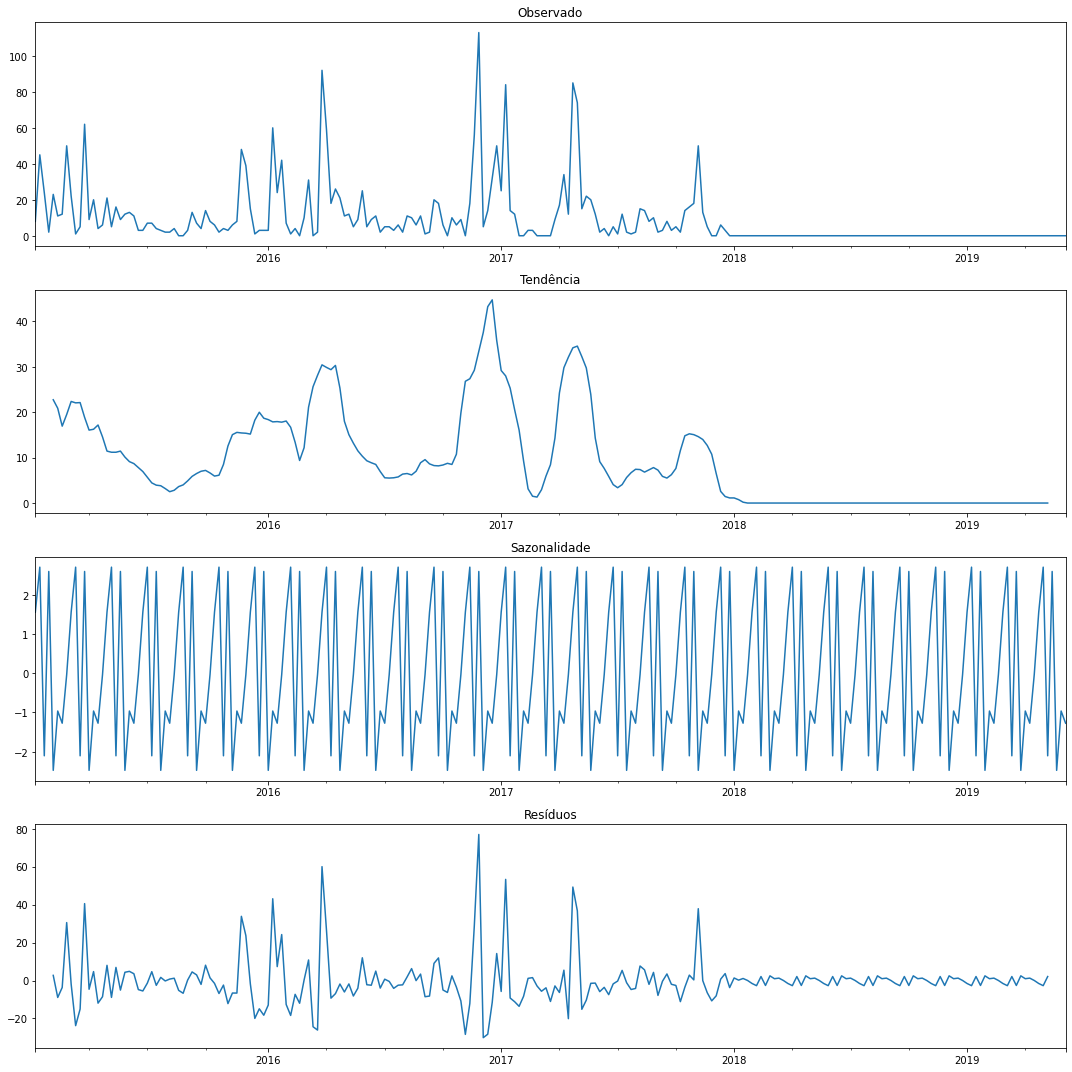

In [34]:
pd.plotting.register_matplotlib_converters()

products = ['VENTILADOR 30 NV-15 3P BR 220V']
#products = ['VENTILADOR 30 NV-15 3P BR 220V', 'VENTILADOR 30CM NV-15 6P BR 220V', 'VENTILADOR VF40 SILENCE FORCE CD RE','VENTILADOR 40CM V-45 3P BR 220V','VENTILADOR 40CM NV-45 6P BR 220V', 'VENTILADOR 30CM NV-32 6P PRETO', 'VENTILADOR 30CM V-36 6P RED PREMIUM', 'VENTILADOR 40CM NV-41 PREMIUM PT', 'VENTILADOR 40CM NV-06 6P COLUNA BR 220V', 'VENTILADOR 40CM V-49 6P RED PREMIUM']
result = seasonal_decompose(dfw_venti[products], model='additive', period = 8)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,15))

#Plota
result.observed.plot(ax = ax1, title = "Observado")
result.trend.plot(ax = ax2, title = "Tendência")
result.seasonal.plot(ax = ax3, title = "Sazonalidade")
result.resid.plot(ax = ax4, title = "Resíduos")

plt.tight_layout()


Alguns modelos apresentam muitas vendas, apresentados os seus picos na época dos perídos mais quentes, final do segundo semestre e início  do novo semestre.(há exceções) 

No geral, todos os modelos possuem vendas distribuídas, apresentando quedas em momentos específicos. 



# Previsão de vendas utilizando a API Prophet

Adição dos feriados

In [19]:
mothers = pd.DataFrame({
    'holiday': 'Dia das mães',
    'ds': ['2015-05-10', '2016-05-08', '2017-05-14', '2018-05-13', '2019-05-12'],
    'lower_window': -7,
    'upper_window': 0
})
fathers = pd.DataFrame({
    'holiday': 'Dia dos pais',
    'ds': ['2015-08-09', '2016-08-14', '2017-08-13', '2018-08-12', '2019-08-11'],
    'lower_window': -7,
    'upper_window': 0
})
valentines = pd.DataFrame({
    'holiday': 'Dia dos namorados',
    'ds': ['2015-06-12', '2016-06-12', '2017-06-12', '2018-06-12', '2018-06-12'],
    'lower_window': -7,
    'upper_window': 0
})
christmas = pd.DataFrame({
    'holiday': 'Natal',
    'ds': ['2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25'],
    'lower_window': -8, # Incluindo a véspera
    'upper_window': 0
})
bf = pd.DataFrame({
    'holiday': 'Black friday',
    'ds': ['2015-11-27', '2016-11-25', '2017-11-24', '2018-11-25', '2019-11-24'],
    'lower_window': -7,
    'upper_window': 0
})
childrens = pd.DataFrame({
    'holiday': 'Dia das crianças',
    'ds': ['2015-10-12', '2016-10-12', '2017-10-12', '2018-10-12', '2019-10-12'],
    'lower_window': -7,
    'upper_window': 0
})
easter = pd.DataFrame({
    'holiday': 'Páscoa',
    'ds': ['2015-04-05', '2016-03-27', '2017-04-16', '2018-04-01', '2019-04-21'], # Domingo de páscoa
    'lower_window': -7,
    'upper_window': 0
})
new_year = pd.DataFrame({
    'holiday': 'Ano Novo',
    'ds': ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
    'lower_window': -8, # Adicionar a véspera
    'upper_window': 0
})
carnival = pd.DataFrame({
    'holiday': 'Carnaval',
    'ds': ['2015-02-18', '2016-02-10', '2017-03-01', '2018-02-14', '2019-03-06'], # Quarta feira de cinzas
    'lower_window': -7, # Adicionar a véspera
    'upper_window': 0
})

holidays = pd.concat((mothers, fathers, valentines, christmas, bf, childrens, easter, new_year))

In [20]:
def createProphetDataFrame(column):
    df2 = pd.DataFrame({'ds': dfw.index, 'y':dfw[column].values})
    df2['floor'] = 0

    return df2

Treino e teste - Separação

In [21]:
size_train = len(dfw[:'2018-01-01'])
size_test = len(dfw['2018-01-01':])

In [22]:
forecasts = []
for product in products:
    ph = Prophet(daily_seasonality=False,holidays=holidays)
    ph.fit(createProphetDataFrame(product)[:size_train])

    future = ph.make_future_dataframe(periods=size_test, freq='W-THU')
    forecasts.append(ph.predict(future))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = []
mad = []
for forecast in forecasts:
    i = 0
    mse.append(mean_squared_error(dfw[products[i]][size_train:], forecast['yhat'][size_train:]))
    mad.append(mean_absolute_error(dfw[products[i]][size_train:], forecast['yhat'][size_train:]))
    i += 1

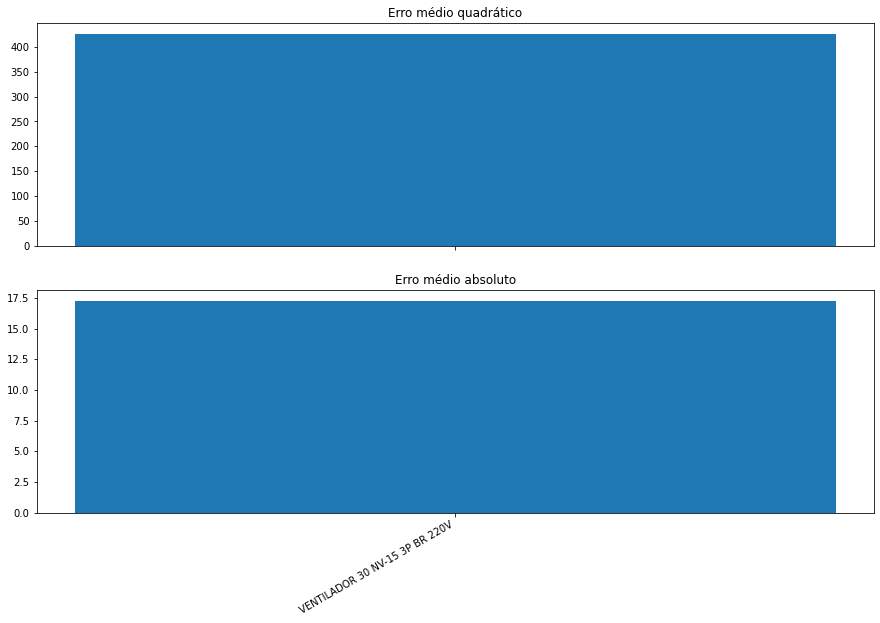

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.bar(height=mse, x=products)
ax1.title.set_text('Erro médio quadrático')

ax2.bar(height=mad, x=products)
ax2.title.set_text('Erro médio absoluto')

fig.autofmt_xdate()
plt.show()

In [28]:

#plt.figure(figsize = (15,5))
#plt.plot(createProphetDataFrame(products[0])[size_train:]['y'].to_list(), 'r--')
#plt.plot(forecasts[0][size_train:]['yhat'].to_list())
#plt.hlines(xmin=0, xmax=size_test, y=0, color='black')
#plt.fill_between(np.linspace(0, size_test-1, size_test), y1=forecasts[1][size_train:]['yhat_lower'], y2=forecasts[0][size_train:]['yhat_upper'], alpha = 0.2)
#plt.legend(['Observado', 'Prophet c/ Feriados'], loc ='upper right')
#plt.show()
 

Comparação entre a série temporal(Observado) e a prevista (Prophet). Aqui está sendo plotado apenas o segundo vetilador mais vendido "VENTILADOR 30CM NV-15 6P BR 220V". 

No período entre a semana 40 e 55 no "observado" nada foi registrado. 

Interessante notar como está acontecendo a previsão do Prophet.  Acontecendo uma previsão irregular. 


